# Online News Popularity

The data description can be found here: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity.

Set up the environment.

In [1]:
import requests
import zipfile

import numpy as np
import pandas as pd
from pandas_datareader import data, wb

import matplotlib.pylab as plt
import seaborn as sns

sns.set_context('notebook')
pd.set_option('float_format', '{:6.2f}'.format)

# Ignore warnings. This is a temporary bug that should disappear in future versions of the libraries used here.
import warnings
warnings.filterwarnings("ignore")

Download data file.

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip'
path = '../data/News_Popularity/news_popularity.zip'

response = requests.get(url)
with open(path, "wb") as file:
    file.write(response.content)

Print contents of the zip file.

In [3]:
zf = zipfile.ZipFile(path)
files = zf.namelist()

print(files)

['OnlineNewsPopularity/', 'OnlineNewsPopularity/OnlineNewsPopularity.names', 'OnlineNewsPopularity/OnlineNewsPopularity.csv']


Load data into pandas DataFrame. Print datatypes.

In [4]:
raw = pd.read_csv(zf.open(files[-1]))
raw.columns = [x.strip() for x in raw.columns]

print(raw.shape)
print(raw.dtypes)

(39644, 61)
url                               object
timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_a

Print descriptive statistics.

In [5]:
print(raw.describe().T[['min', 'mean', 'max', 'std']])

                                 min      mean       max       std
timedelta                       8.00    354.53    731.00    214.16
n_tokens_title                  2.00     10.40     23.00      2.11
n_tokens_content                0.00    546.51   8474.00    471.11
n_unique_tokens                 0.00      0.55    701.00      3.52
n_non_stop_words                0.00      1.00   1042.00      5.23
n_non_stop_unique_tokens        0.00      0.69    650.00      3.26
num_hrefs                       0.00     10.88    304.00     11.33
num_self_hrefs                  0.00      3.29    116.00      3.86
num_imgs                        0.00      4.54    128.00      8.31
num_videos                      0.00      1.25     91.00      4.11
average_token_length            0.00      4.55      8.04      0.84
num_keywords                    1.00      7.22     10.00      1.91
data_channel_is_lifestyle       0.00      0.05      1.00      0.22
data_channel_is_entertainment   0.00      0.18      1.00      

Interesting variables:

- *num_imgs*: Number of images
- *num_videos*: Number of videos
- *data_channel_is_lifestyle*:     Is data channel 'Lifestyle'?
- *data_channel_is_entertainment*: Is data channel 'Entertainment'?
- *data_channel_is_bus*:           Is data channel 'Business'?
- *data_channel_is_socmed*:        Is data channel 'Social Media'?
- *data_channel_is_tech*:          Is data channel 'Tech'?
- *data_channel_is_world*:         Is data channel 'World'?
- *weekday_is_monday*:             Was the article published on a Monday?
- *weekday_is_tuesday*:            Was the article published on a Tuesday?
- *weekday_is_wednesday*:          Was the article published on a Wednesday?
- *weekday_is_thursday*:           Was the article published on a Thursday?
- *weekday_is_friday*:             Was the article published on a Friday?
- *weekday_is_saturday*:           Was the article published on a Saturday?
- *weekday_is_sunday*:             Was the article published on a Sunday?
- *is_weekend*:                    Was the article published on the weekend?
- *global_rate_positive_words*:    Rate of positive words in the content
- *global_rate_negative_words*:    Rate of negative words in the content
- *shares*:                        Number of shares (target)

Extract names of binary variables.

In [6]:
data_channel = raw.columns[13:19]
print(data_channel)
weekday = raw.columns[31:38]
print(weekday)

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')
Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'],
      dtype='object')


Combine binary variables to catergorical variables.

In [21]:
data = raw.copy()
for key, value in {'data_channel': data_channel, 'weekday': weekday}.items():
    data[key] = np.nan

    for category in value:
        new_category = category.split('_')[-1]
        cat = ['non-' + new_category, new_category]
        data[category] = pd.Categorical.from_codes(data[category],
                                                   categories=cat)
        condition = data[category] == new_category
        data.ix[condition, key] = data.ix[condition, category]

    data[key] = data[key].astype('category')
    print(data[key].value_counts())

wednesday    7435
tuesday      7390
thursday     7267
monday       6661
friday       5701
sunday       2737
saturday     2453
Name: weekday, dtype: int64
world            8427
tech             7346
entertainment    7057
bus              6258
socmed           2323
lifestyle        2099
Name: data_channel, dtype: int64


Convert 'is_weekend' to categorical variable.

In [22]:
print(data['is_weekend'].describe())
data['weekend'] = pd.Categorical.from_codes(data['is_weekend'],
                                            categories=['no', 'yes'])
print(data['weekend'].value_counts())

count   39644.00
mean        0.13
std         0.34
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: is_weekend, dtype: float64
no     34454
yes     5190
Name: weekend, dtype: int64


In [23]:
print(data['data_channel'].head())

0    entertainment
1              bus
2              bus
3    entertainment
4             tech
Name: data_channel, dtype: category
Categories (6, object): [bus, entertainment, lifestyle, socmed, tech, world]


Set index and print descriptive statistics once again.

Compute logs of some variables. Throw away "outliers" just for the sake of nicer pictures.

In [24]:
df = data.tail()[['num_imgs', 'num_videos']]
print(df[df['num_videos'] >= 2])

       num_imgs  num_videos
39640      3.00       48.00
39643      0.00        2.00


In [25]:
cols = ['shares', 'num_imgs', 'num_videos']
new_cols = ['log_' + x for x in cols]
data[new_cols] = data[cols].apply(lambda x: np.log(1 + x))
data = data[pd.qcut(data['log_shares'],
                    [0, .05, .95, 1], labels=False) == 1]

Plot the distribution of log shares.

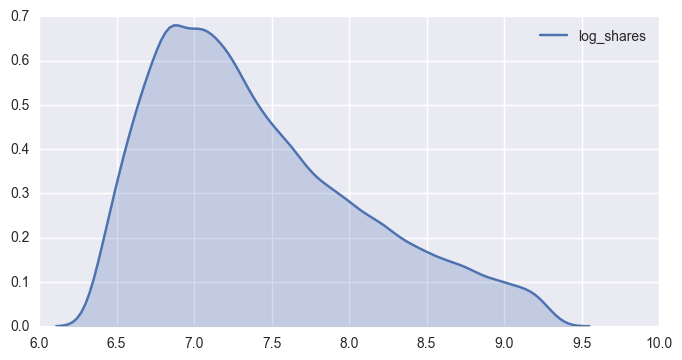

In [26]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data['log_shares'], shade=True)
plt.show()

Plot the distribution of log number of images and videos on the same plot.

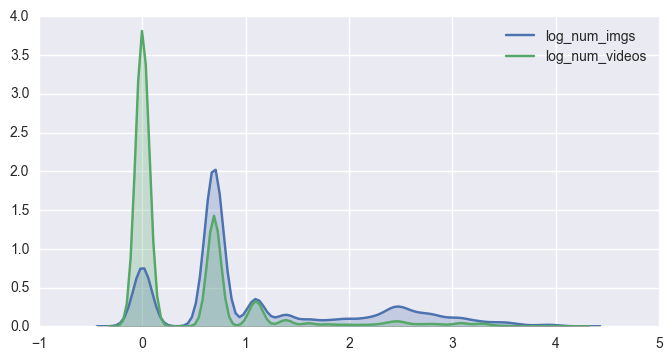

In [27]:
plt.figure(figsize=(8, 4))
for col in ['log_num_imgs', 'log_num_videos']:
    sns.kdeplot(data[col], shade=True, cut=5, clip=(-1, 4))
plt.show()

Plot the same distributions but on subplots.

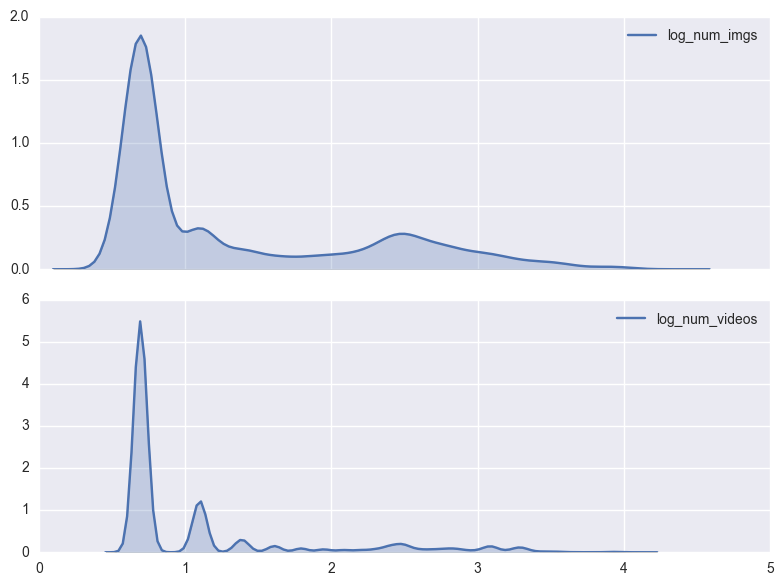

In [28]:
fig, axes = plt.subplots(figsize=(8, 6), nrows=2, ncols=1, sharex=True)
for i, col in enumerate(['log_num_imgs', 'log_num_videos']):
    sns.kdeplot(data[col], shade=True, cut=5, clip=(0, 4), ax=axes[i])
plt.tight_layout()
plt.show()

Plot scatter plots and histograms on the same gridplot.

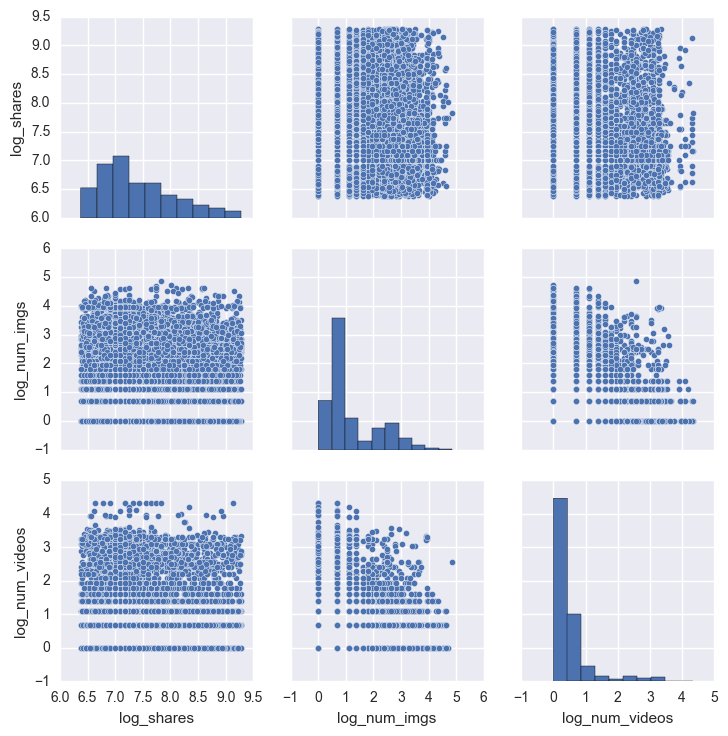

In [29]:
sns.pairplot(data[['log_shares', 'log_num_imgs', 'log_num_videos']])
plt.show()

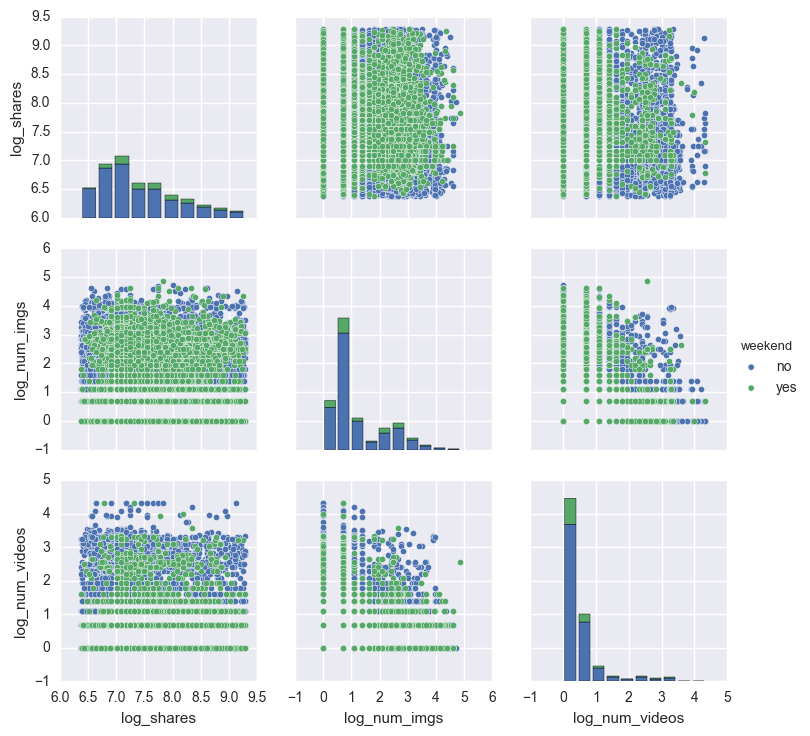

In [30]:
df = data[['log_shares', 'log_num_imgs', 'log_num_videos', 'weekend']]
sns.pairplot(df, hue='weekend')
plt.show()

Convert scatters to contourplots.

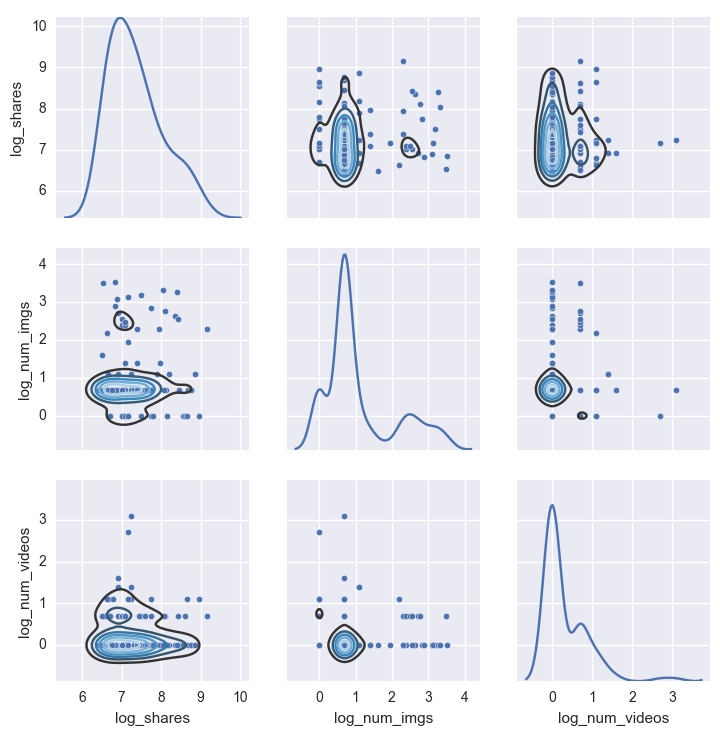

In [31]:
g = sns.pairplot(data[['log_shares', 'log_num_imgs', 'log_num_videos']].sample(100),
                 diag_kind='kde')
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)
plt.show()

Draw joint density of two variables.

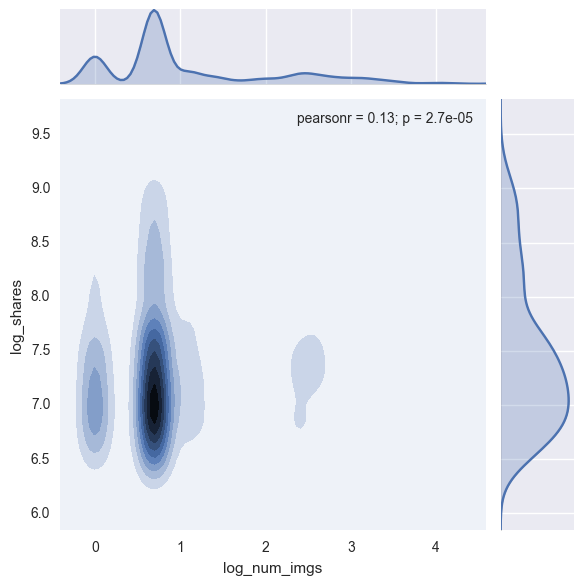

In [32]:
sns.jointplot(x='log_num_imgs', y='log_shares', data=data.sample(1000), kind='kde')
plt.show()

Draw boxplot of log shares for each weekday.

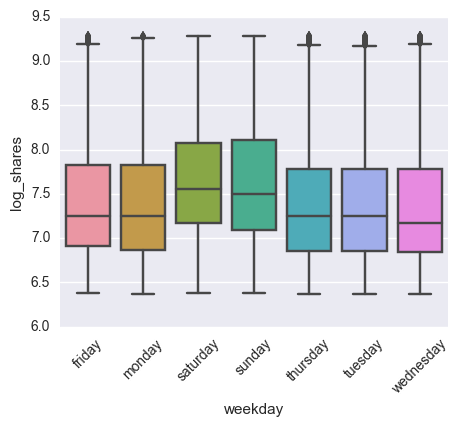

In [33]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='weekday', y='log_shares', data=data)
plt.xticks(rotation=45)
plt.show()

Draw violinplots instead of boxplots.

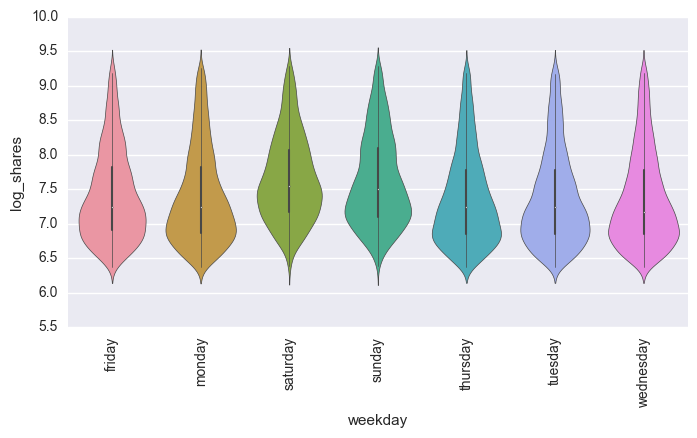

In [34]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='weekday', y='log_shares', data=data, linewidth=.5)
plt.xticks(rotation='vertical')
plt.show()

Separate violinplots by weekend or workday.

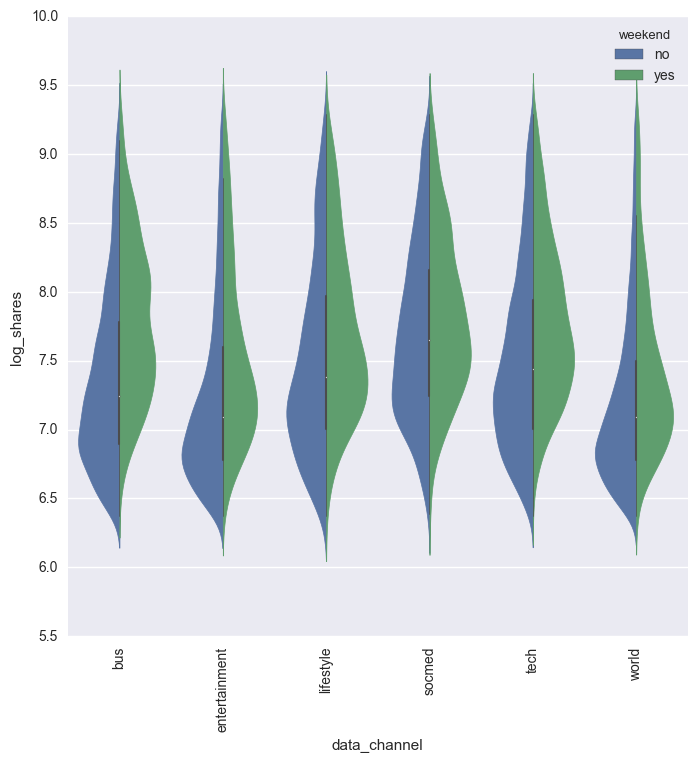

In [35]:
plt.figure(figsize=(8, 8))
sns.violinplot(x='data_channel', y='log_shares',
               hue='weekend', split=True,
               linewidth=.5, data=data)
plt.xticks(rotation='vertical')
plt.show()

Separate boxplots by data channel and weekday.

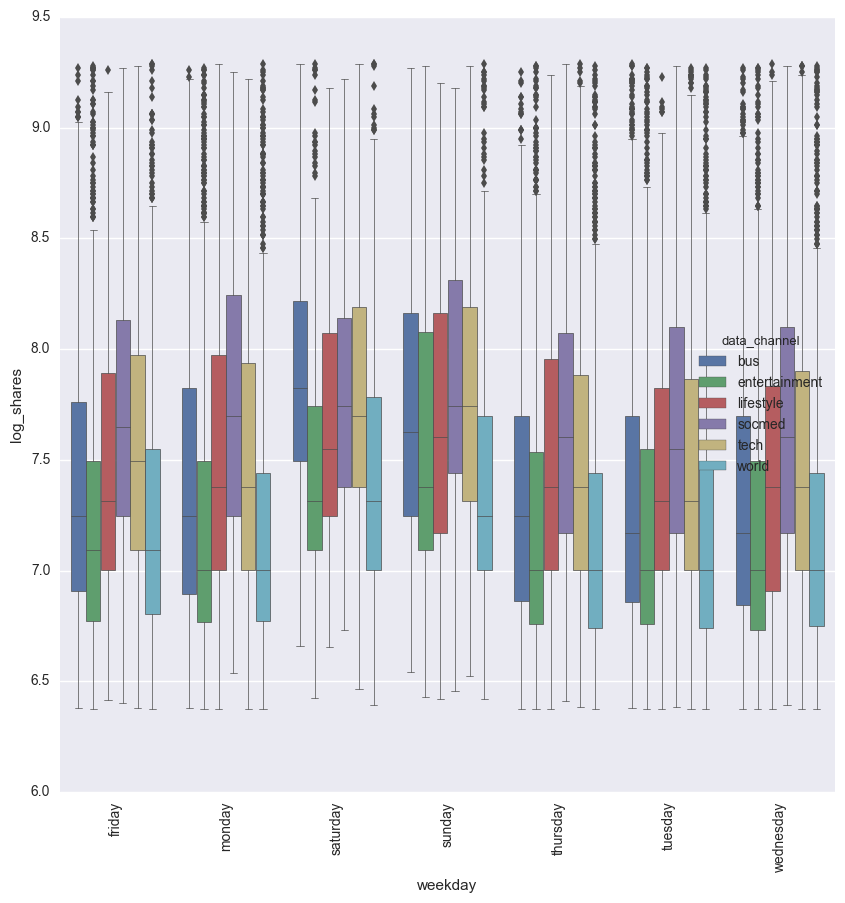

In [36]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='weekday', y='log_shares',
            hue='data_channel', data=data, linewidth=.5)
plt.xticks(rotation='vertical')
plt.show()

Draw scatter together with regression line and CI.

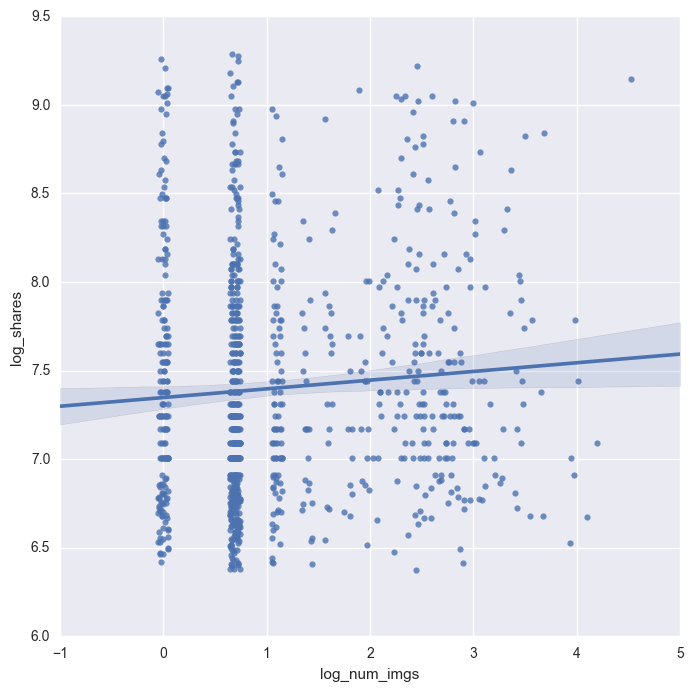

In [37]:
plt.figure(figsize=(8, 8))
sns.regplot(x='log_num_imgs', y='log_shares',
            data=data.sample(1000), x_jitter=.05)
plt.show()

Add densities on the edges.

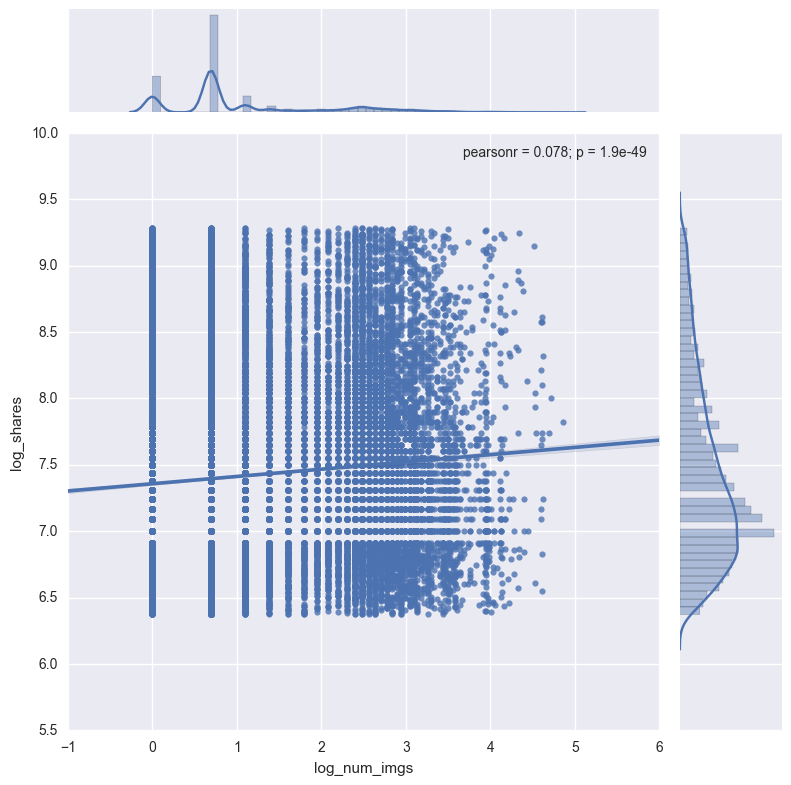

In [38]:
sns.jointplot(x='log_num_imgs', y='log_shares',
              data=data, size=8, kind='reg')
plt.show()

Separate regression by weekend and workday.

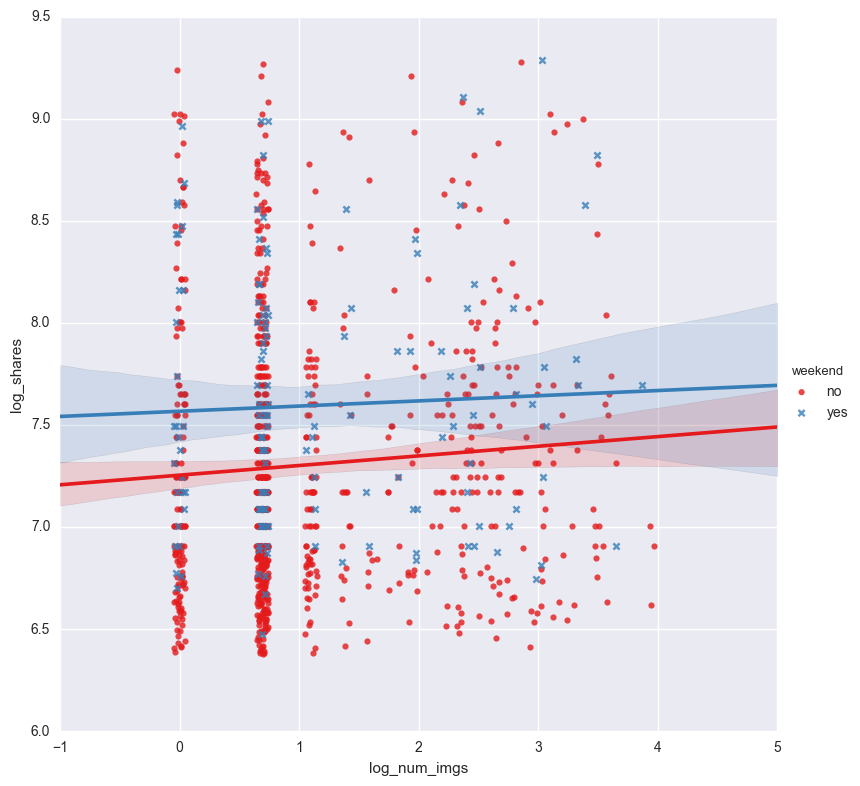

In [39]:
sns.lmplot(x='log_num_imgs', y='log_shares', size=8,
           data=data.sample(1000),
           x_jitter=.05, hue='weekend',
           markers=["o", "x"], palette="Set1")
plt.show()

Separate regressions by two categorical variables.

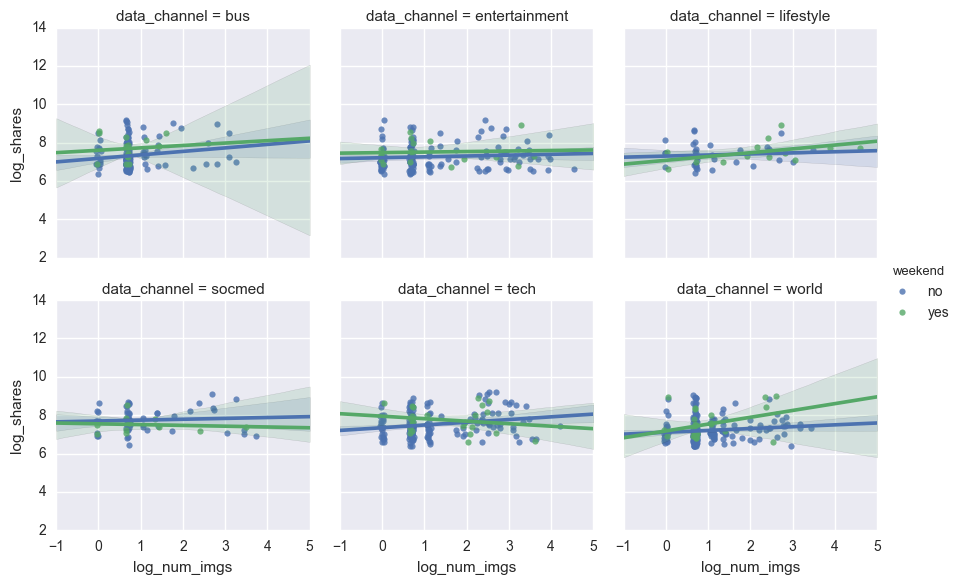

In [40]:
sns.lmplot(x='log_num_imgs', y='log_shares', size=3,
           col='data_channel',
           data=data.sample(1000), x_jitter=.05,
           hue='weekend',
           col_wrap=3)
plt.show()

Plot regression lines for two X variables.

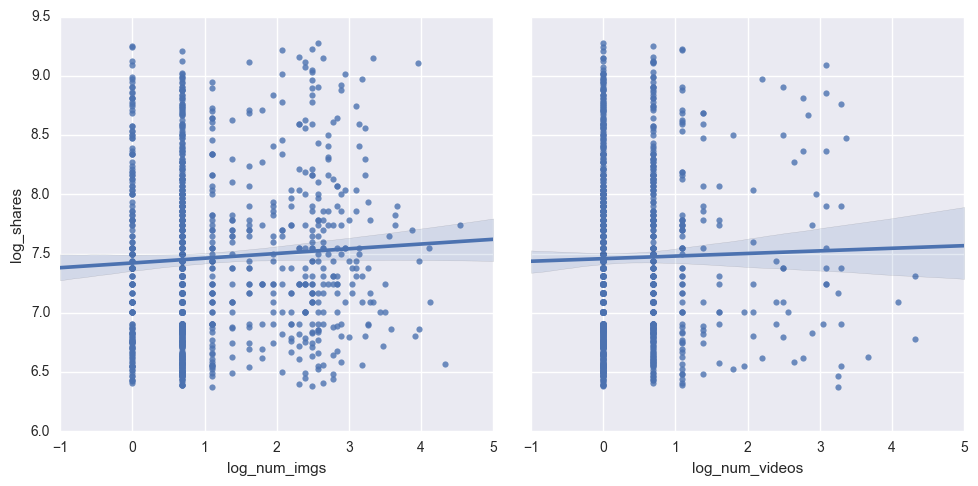

In [41]:
sns.pairplot(x_vars=['log_num_imgs', 'log_num_videos'], y_vars=['log_shares'],
             data=data.sample(1000), kind='reg', size=5)
plt.show()

... and separate them by weekend.

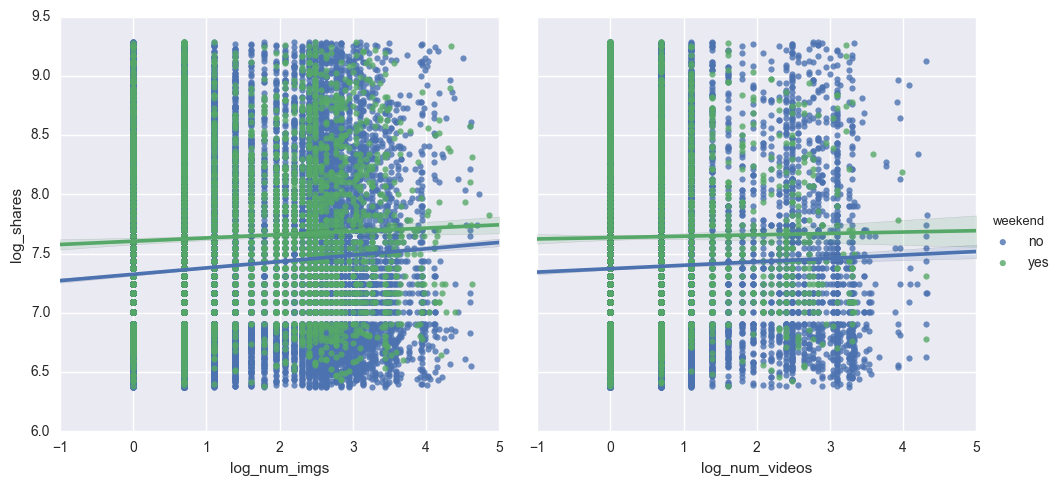

In [42]:
sns.pairplot(x_vars=['log_num_imgs', 'log_num_videos'], y_vars=['log_shares'],
             hue='weekend', data=data, kind='reg', size=5)
plt.show()